In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [98]:
data = pd.read_csv('data_evaluacion.csv', header=None)

In [99]:
# Definir las etiquetas
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'
]

# Asignar las etiquetas al dataframe sin eliminar la primera fila de datos
data.columns = column_names

In [100]:
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week        country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  country         48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [102]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
data.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [104]:
#Revision de valores unicos en las columnas categoricas
colum_cat = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in colum_cat}

unique_values

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

In [106]:
#Remplazar valores faltantes '?' con NaN
data.replace(' ?', pd.NA,inplace=True)


In [107]:
#Cargar los valores faltantes con la moda de cada columna
for col in ['workclass', 'occupation', 'country']:
    mode_value = data[col].mode()
    if not mode_value.empty:
        data[col] = data[col].fillna(mode_value[0])
    else:
        print(f"No hay valores válidos en la columna: {col}")

In [108]:
data.isnull().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [109]:
print(data['workclass'].unique())
print(data['occupation'].unique())
print(data['country'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [110]:
# Codificación de variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns.difference(['salary'])


In [111]:
#Crear el codificador OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

#Aplicar la codificacion a las columnas categoricas
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))


In [112]:
#Codificamos de la variable objetivo
label_encoder = LabelEncoder()
data['salary'] = label_encoder.fit_transform(data['salary'])


In [113]:
#Unir las columnas codificadas con las numericas
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_data], axis=1)

In [114]:
data.head(25)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,country_Cambodia,country_Canada,country_China,...,relationship_Wife,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,77516,13,2174,0,40,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,7,0,0,40,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,13,0,0,40,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,37,284582,14,0,0,40,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,49,160187,5,0,0,16,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,52,209642,9,0,0,45,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,31,45781,14,14084,0,50,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,42,159449,13,5178,0,40,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
#Dividir el dataset en caracteristicas de entrenamiento y objetivo
X = data.drop('salary', axis=1)
y = data['salary']



##REGRESIÓN LINEAL

In [138]:
#Dividir el dataset en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [142]:
print(y_train.value_counts())
print(y_test.value_counts())

salary
0    26046
1     8143
Name: count, dtype: int64
salary
0    11109
1     3544
Name: count, dtype: int64


In [143]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Logistic Regression Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", conf_matrix)

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11109
           1       0.74      0.58      0.65      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653

Logistic Regression Confusion Matrix:
 [[10385   724]
 [ 1480  2064]]


##Modelo de KNN

In [144]:
#Modelo de KNN e indentificar el mejor valor de K

best_k = 1
best_score = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(scaler.transform(X_test))
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K: {best_k}, Best Score: {best_score}")

print("KNN Report:\n", classification_report(y_test, y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

Best K: 17, Best Score: 0.8130758206510612
KNN Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89     11109
           1       0.74      0.34      0.47      3544

    accuracy                           0.81     14653
   macro avg       0.78      0.65      0.68     14653
weighted avg       0.80      0.81      0.78     14653

KNN Confusion Matrix:
 [[10669   440]
 [ 2322  1222]]


##Arbol de desiciones

In [146]:
# Árbol de Decisiones
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_acc = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_decision_tree))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     11109
           1       0.61      0.63      0.62      3544

    accuracy                           0.81     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.81      0.82     14653



##SVM Kernel lineal

In [147]:
# SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
svm_linear_acc = accuracy_score(y_test, y_pred_svm_linear)
print("SVM con kernel lineal Report:\n", classification_report(y_test, y_pred_svm_linear))

SVM con kernel lineal Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     11109
           1       0.75      0.56      0.64      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



##SVM Kernel RBF

In [148]:
# SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
svm_rbf_acc = accuracy_score(y_test, y_pred_svm_rbf)
print("SVM con kernel RBF Report:\n", classification_report(y_test, y_pred_svm_rbf))

SVM con kernel RBF Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     11109
           1       0.76      0.54      0.64      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



##SVM Kernel Poly

In [149]:
# SVM con kernel polinómico
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
svm_poly_acc = accuracy_score(y_test, y_pred_svm_poly)
print("SVM con kernel polinómico Report:\n", classification_report(y_test, y_pred_svm_poly))

SVM con kernel polinómico Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     11109
           1       0.74      0.46      0.57      3544

    accuracy                           0.83     14653
   macro avg       0.80      0.71      0.73     14653
weighted avg       0.82      0.83      0.82     14653



##SVM Kernel Sigmoid

In [150]:
# SVM con kernel sigmoide
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_svm_sigmoid = svm_sigmoid.predict(X_test)
svm_sigmoid_acc = accuracy_score(y_test, y_pred_svm_sigmoid)
print("SVM con kernel sigmoide Report:\n", classification_report(y_test, y_pred_svm_sigmoid))

SVM con kernel sigmoide Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     11109
           1       0.65      0.56      0.60      3544

    accuracy                           0.82     14653
   macro avg       0.76      0.73      0.74     14653
weighted avg       0.81      0.82      0.82     14653



##Naive Bayes

In [91]:
# Definir el modelo de Naive Bayes
nb = GaussianNB()

# Validación cruzada para evaluar el modelo
cv_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')

# Entrenar el modelo
nb.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = nb.predict(X_test)

# Evaluar el modelo
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_acc}')
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Mostrar la precisión media y la desviación estándar de la validación cruzada
print(f'Cross-validated accuracy: {cv_scores.mean()} ± {cv_scores.std()}')



Naive Bayes Accuracy: 0.5998089128506108
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.49      0.65     11109
           1       0.37      0.94      0.53      3544

    accuracy                           0.60     14653
   macro avg       0.67      0.72      0.59     14653
weighted avg       0.82      0.60      0.62     14653

Cross-validated accuracy: 0.5337349126997378 ± 0.0807491322772323


## Red Neuronal Artificial

In [24]:
# Dividir el dataset en características (X) y variable objetivo (y)
X = data.drop('salary', axis=1)
y = data['salary']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la red neuronal mejorada
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Añadir dropout para prevenir el sobreajuste
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Asumiendo que la clasificación es binaria

# Compilar el modelo con un optimizador personalizado
optimizer = Adam(learning_rate=0.001)  # Ajustar la tasa de aprendizaje si es necesario
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Exactitud de la red neuronal: {accuracy}')

# Predicción y reporte de clasificación
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))



Epoch 1/150
855/855 [==============================] - 5s 5ms/step - loss: 0.3984 - accuracy: 0.8136 - val_loss: 0.3374 - val_accuracy: 0.8447
Epoch 2/150
855/855 [==============================] - 4s 4ms/step - loss: 0.3496 - accuracy: 0.8403 - val_loss: 0.3264 - val_accuracy: 0.8486
Epoch 3/150
855/855 [==============================] - 4s 4ms/step - loss: 0.3364 - accuracy: 0.8424 - val_loss: 0.3187 - val_accuracy: 0.8516
Epoch 4/150
855/855 [==============================] - 4s 5ms/step - loss: 0.3260 - accuracy: 0.8489 - val_loss: 0.3178 - val_accuracy: 0.8530
Epoch 5/150
855/855 [==============================] - 4s 5ms/step - loss: 0.3224 - accuracy: 0.8514 - val_loss: 0.3160 - val_accuracy: 0.8545
Epoch 6/150
855/855 [==============================] - 3s 4ms/step - loss: 0.3182 - accuracy: 0.8531 - val_loss: 0.3172 - val_accuracy: 0.8568
Epoch 7/150
855/855 [==============================] - 3s 4ms/step - loss: 0.3158 - accuracy: 0.8520 - val_loss: 0.3151 - val_accuracy: 0.8562

##Gráfica

In [153]:
pip install matplotlib scikit-learn


In [154]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


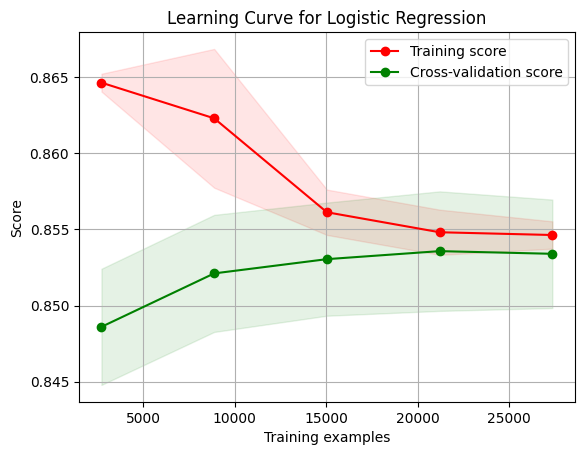

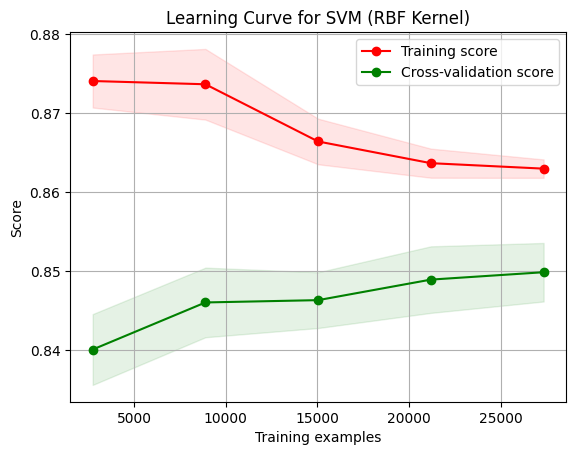

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


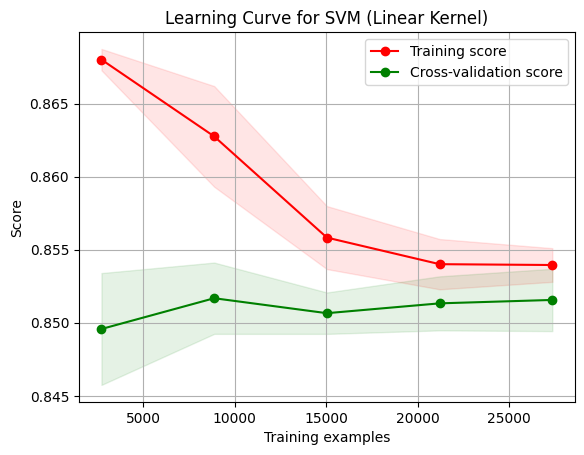

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
from sklearn.neural_network import MLPClassifier

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (Poly Kernel)": SVC(kernel='poly'),
    "SVM (Sigmoid Kernel)": SVC(kernel='sigmoid'),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Graficar las curvas de aprendizaje para cada modelo
for name, model in models.items():
    plot_learning_curve(model, f"Learning Curve for {name}", X_train, y_train, cv=5, n_jobs=-1)
    plt.show()
